In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats

from matplotlib import pyplot as plt

In [3]:
nts = ['A', 'T', 'G', 'C']
nseqs = 5000 ###For each dataset we'll simulate 5k sequences, lower number here will be noisier
length_of_each_seq = 16 ###Keep this number reasonable or it'll take a while to run. I use 16 in the paper
randomizations = 20 ###This data is so clean there is no point of randomizing a ton except to heat your house

In [4]:
def get_info_theory_init(sequence_dict, randomize=False):
    positional_entropies = []
    matrix = np.array([list(i) for i in sequence_dict.values()])
    if randomize:
        for i in matrix:
            np.random.shuffle(i)
    seqs, lengths = np.shape(matrix)
    bool_A = matrix == 'A'
    bool_T = matrix == 'T'
    bool_G = matrix == 'G'
    bool_C = matrix == 'C'

    A_counts = bool_A.sum(axis=0)
    T_counts = bool_T.sum(axis=0)
    G_counts = bool_G.sum(axis=0)
    C_counts = bool_C.sum(axis=0)
    p_A = A_counts/float(seqs)
    p_T = T_counts/float(seqs)
    p_G = G_counts/float(seqs)
    p_C = C_counts/float(seqs)
    positional_entropies = np.log2(4) - stats.entropy([p_A, p_T, p_G, p_C], base=2)
    return positional_entropies

def get_delta_I(sequence_dict, randomizations=20):
    positional_data = get_info_theory_init(sequence_dict)
    I_actual = np.sum(positional_data)
    
    randomized_list = []
    for i in range(randomizations):
        positions_random = get_info_theory_init(utrs, randomize=True)
        randomized_list.append(np.sum(positions_random))
    return I_actual, I_actual - np.mean(randomized_list)

# Random UTRs

Should produce values of roughly zero

In [5]:
utrs = {}
for i in range(nseqs):
    utrs[i] = list(np.random.choice(nts, size=length_of_each_seq))
len(utrs), len(utrs[0])

(5000, 16)

In [6]:
print(utrs[0])

['G', 'C', 'A', 'G', 'G', 'A', 'C', 'A', 'T', 'A', 'G', 'A', 'C', 'G', 'G', 'T']


In [7]:
I_actual, delta_I = get_delta_I(utrs, randomizations=randomizations)

In [8]:
print(I_actual, delta_I)

0.0077484259152 0.0010932759479


# Common xmer, defined position
Expected value of I is 2 x length of the xmer

In [9]:
xmer = 'AGGAGG'
utrs = {}
for i in range(nseqs):
    utrs[i] = list(np.random.choice(nts, size=length_of_each_seq-len(xmer))) + list(xmer)
len(utrs), len(utrs[0])

(5000, 16)

In [10]:
I_actual, delta_I = get_delta_I(utrs, randomizations=randomizations)

In [11]:
print(I_actual, delta_I)

12.0042822394 10.0908415198


# All things equal, the longer the xmer the stronger the deltaI
As above, expected values of I are 2 x length of the xmer. Expect roughly linear response

In [30]:
xmers = ['AGG', 'AGGA', 'AGGAG', 'AGGAGG', 'AAGGAGG', 'AAGGAGGT', 'AAAGGAGGT']
delta_Ivals = []
for xmer in xmers:
    utrs = {}
    for i in range(nseqs):
        utrs[i] = list(np.random.choice(nts, size=length_of_each_seq-len(xmer))) + list(xmer)
    print(len(utrs), len(utrs[0]))
    I_actual, delta_I = get_delta_I(utrs, randomizations=randomizations)
    delta_Ivals.append(delta_I)

5000 16
5000 16
5000 16
5000 16
5000 16
5000 16
5000 16


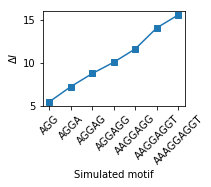

In [35]:
fig, ax = plt.subplots(figsize=(3,2.7))
ax.plot(delta_Ivals, marker='s')
ax.set_xticks(range(len(delta_Ivals)))
ax.set_xticklabels(xmers, rotation=45)
ax.set_ylabel('$\Delta I$')
ax.set_xlabel('Simulated motif')
plt.tight_layout()
plt.savefig('../Results/Figures/simulated_motifs.pdf')

# All things equal, the more sequences that contain the motif the stronger the deltaI

Won't produce a linear result. But such is the nature of entropy

In [36]:
xmer1 = 'AGGAGG'
delta_Ivals_v1 = []
for prob in np.arange(0, 1.1, 0.1):
    utrs = {}
    for i in range(nseqs):
        if np.random.uniform(0, 1) < prob:
            utrs[i] = list(np.random.choice(nts, size=length_of_each_seq-len(xmer1))) + list(xmer1)
        else:
            utrs[i] = list(np.random.choice(nts, size=length_of_each_seq))
    print(prob, len(utrs), len(utrs[0]))
    I_actual, delta_I = get_delta_I(utrs, randomizations=randomizations)
    delta_Ivals_v1.append(delta_I)
print('####################')
xmer2 = 'AGGA'
delta_Ivals_v2 = []
for prob in np.arange(0, 1.1, 0.1):
    utrs = {}
    for i in range(nseqs):
        if np.random.uniform(0, 1) < prob:
            utrs[i] = list(np.random.choice(nts, size=length_of_each_seq-len(xmer2))) + list(xmer2)
        else:
            utrs[i] = list(np.random.choice(nts, size=length_of_each_seq))
    print(prob, len(utrs), len(utrs[0]))
    I_actual, delta_I = get_delta_I(utrs, randomizations=randomizations)
    delta_Ivals_v2.append(delta_I)

0.0 5000 16
0.1 5000 16
0.2 5000 16
0.3 5000 16
0.4 5000 16
0.5 5000 16
0.6 5000 16
0.7 5000 16
0.8 5000 16
0.9 5000 16
1.0 5000 16
####################
0.0 5000 16
0.1 5000 16
0.2 5000 16
0.3 5000 16
0.4 5000 16
0.5 5000 16
0.6 5000 16
0.7 5000 16
0.8 5000 16
0.9 5000 16
1.0 5000 16


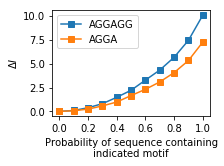

In [41]:
fig, ax = plt.subplots(figsize=(3,2.4))
ax.plot(np.arange(0,1.1,0.1), delta_Ivals_v1, marker='s', label=xmer1)
ax.plot(np.arange(0,1.1,0.1), delta_Ivals_v2, marker='s', label=xmer2)
ax.set_xticks(np.arange(0,1.1,0.2))
ax.set_ylabel('$\Delta I$')
ax.set_xlabel('Probability of sequence containing\nindicated motif')
legend = plt.legend()
plt.tight_layout()
plt.savefig('../Results/Figures/simulated_motif_probabilities.pdf')

# All things equal, the more positionally constrained the motif the stronger the deltaI

It's not immediately clear what expected output function will look like, but more positionally constrained data will have higher values. This is a subtle and I believe important advantage of deltaI over traditional methods. It is known that there is an optimum spacing between SD sites and the start codon but metrics that allow any a SD sequence to occur within *any* window (without punishing non-optimal spacing) will be biased. The best method should provide the highest value for having the most sequences occur in the most positionally constrained manner.

What I am doing here is saying that every sequence will have the given motif, but where it occurs will vary according to a uniform distribution. I'm progressively tightening that uniform distribution so at first the sequence can occur anywhere and by the end it can only occur at one point and should have the expected value of 2 x the length of the motif as before

In [42]:
xmer1 = 'AGGAGG'
delta_Ivals_v1 = []
for position in range(0, length_of_each_seq+1-len(xmer1)):
    utrs = {}
    for i in range(nseqs):
        l_counts = int(np.floor(np.random.uniform(position, length_of_each_seq+1-len(xmer1))))
        r_counts = length_of_each_seq - l_counts - len(xmer1)
        seq = list(np.random.choice(nts, size=l_counts)) + list(xmer1) + list(np.random.choice(nts, size=r_counts))
        utrs[i] = seq
    print(position, len(utrs), len(utrs[0]))
    I_actual, delta_I = get_delta_I(utrs, randomizations=randomizations)
    delta_Ivals_v1.append(delta_I)
print('####################')
xmer2 = 'AGGA'
delta_Ivals_v2 = []
for position in range(0, length_of_each_seq+1-len(xmer2)):
    utrs = {}
    for i in range(nseqs):
        l_counts = int(np.floor(np.random.uniform(position, length_of_each_seq+1-len(xmer2))))
        r_counts = length_of_each_seq - l_counts - len(xmer2)
        seq = list(np.random.choice(nts, size=l_counts)) + list(xmer2) + list(np.random.choice(nts, size=r_counts))
        utrs[i] = seq
    print(position, len(utrs), len(utrs[0]))
    I_actual, delta_I = get_delta_I(utrs, randomizations=randomizations)
    delta_Ivals_v2.append(delta_I)

0 5000 16
1 5000 16
2 5000 16
3 5000 16
4 5000 16
5 5000 16
6 5000 16
7 5000 16
8 5000 16
9 5000 16
10 5000 16
####################
0 5000 16
1 5000 16
2 5000 16
3 5000 16
4 5000 16
5 5000 16
6 5000 16
7 5000 16
8 5000 16
9 5000 16
10 5000 16
11 5000 16
12 5000 16


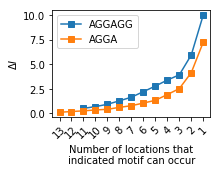

In [45]:
fig, ax = plt.subplots(figsize=(3,2.5))
ax.plot(range(len(xmer1)-len(xmer2), length_of_each_seq+1-len(xmer1)+len(xmer1)-len(xmer2)), delta_Ivals_v1, marker='s', label=xmer1)
ax.plot(range(0, length_of_each_seq+1-len(xmer2)), delta_Ivals_v2, marker='s', label=xmer2)
ax.set_xticks(range(0, length_of_each_seq+1-len(xmer2)))
ax.set_xticklabels([length_of_each_seq+1-len(xmer2)-i for i in range(0, length_of_each_seq+1-len(xmer2))], rotation=45)
ax.set_ylabel('$\Delta I$')
ax.set_xlabel('Number of locations that\nindicated motif can occur'.format(xmer))
legend = plt.legend()
plt.tight_layout()
plt.savefig('../Results/Figures/simulated_positional_constraint.pdf')